#### Importing the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score 
from IPython.display import Image 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
import graphviz


In [2]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


#### Loading the Data Set

In [5]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- This is a classification problem and we have three classes, and all are numeric except species. Need to encode species.

#### Checking for imbalanced Data

In [6]:
df["species"].value_counts() ##no imbalanced data

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

- Not imbalanced
- Label encoding on target

#### Applying Label encoding

In [10]:
df["species"]=df["species"].replace({"setosa":0,"versicolor":1,"virginica":2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Checking for missing values

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- No missing values and no scaling is required.

#### Seggregate the features and target

In [13]:
x=df.drop(columns=["species"])
y=df["species"]

#### Split the data for training and test

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1200)

In [15]:
x_train.shape

(112, 4)

#### Fitting Decision Tree Classifier Model - classification problem

In [16]:
dtc=DecisionTreeClassifier()

#### Training

In [17]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

#### Prediction

In [18]:
y_pred=dtc.predict(x_test)

In [19]:
y_pred

array([1, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 2,
       1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2], dtype=int64)

#### Model evaluation

- We can rely on accuracy, no need to check recall or precision.
- But accuracy give misleading result on imbalanced data.

In [20]:
ac=accuracy_score(y_test,y_pred)
ac

0.9210526315789473

- We will check overfitting first.

#### Confusion Matrix

In [24]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 11]], dtype=int64)

- Three class, so we will change average from binary to weighted.

In [25]:
f1_score(y_test,y_pred,average="weighted")

0.9203992740471869

- Not much difference in accuracy and f1 score, so no overfitting.

#### Accuracy on training

In [26]:
y_pred_train=dtc.predict(x_train)

In [27]:
accuracy_score(y_train,y_pred_train)

1.0

- 100% accuracy on training.
- Machine may have learned the data.

#### Tree

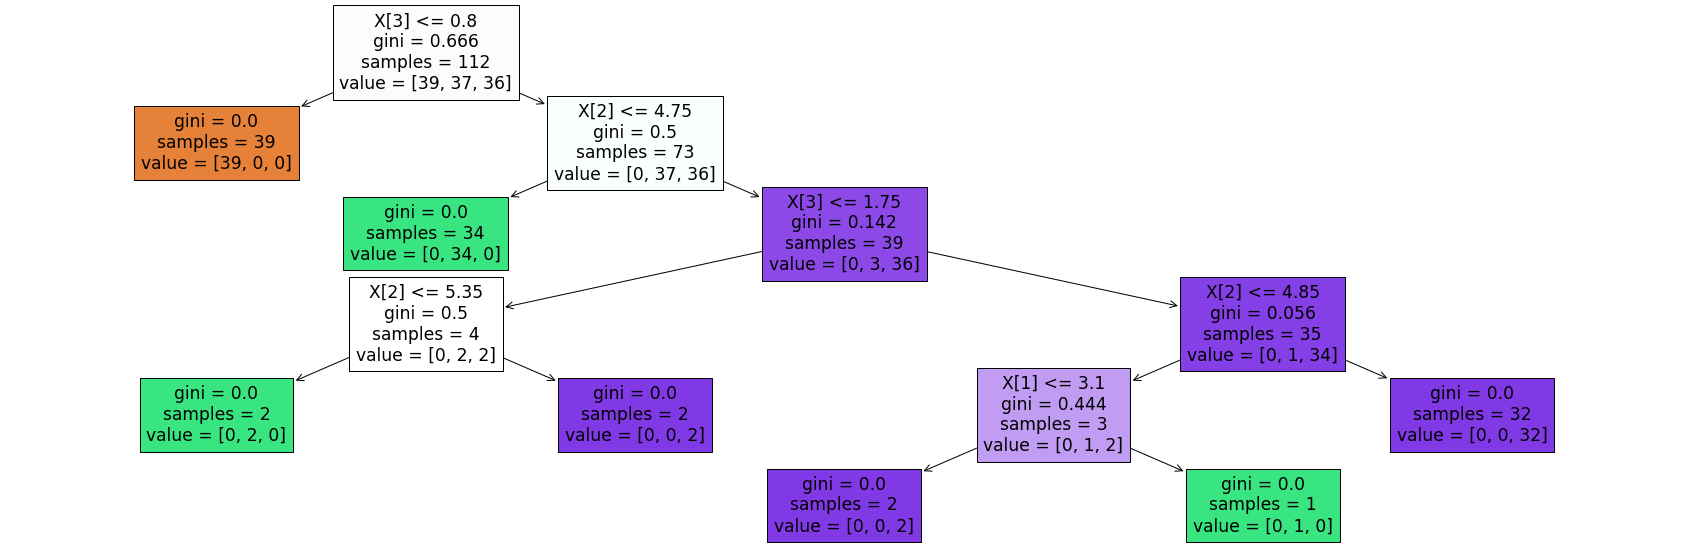

In [31]:
plt.figure(figsize=(30,10))
tree.plot_tree(dtc,filled=True)
plt.show()

#### Passing the different parameters to see overfitting/underfitting

#### max_depth

In [32]:
dtc_u=DecisionTreeClassifier(max_depth=1)  ## underfitting situation

In [33]:
dtc_u.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [34]:
y_pred_u=dtc_u.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred_u)

0.631578947368421

In [36]:
y_pred_u_train=dtc_u.predict(x_train)

In [37]:
accuracy_score(y_train,y_pred_u_train)

0.6785714285714286

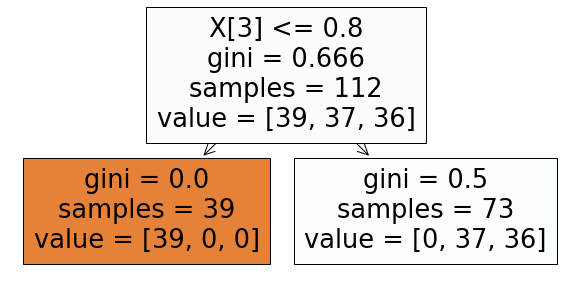

In [40]:
plt.figure(figsize=(10,5))
tree.plot_tree(dtc_u,filled=True)
plt.show()

#### Min_sample_split

In [41]:
dtc_u=DecisionTreeClassifier(min_samples_split=60)

In [42]:
dtc_u.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=60)

In [43]:
y_pred_u=dtc_u.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred_u)

0.8947368421052632

In [45]:
y_pred_u_train=dtc_u.predict(x_train)

In [46]:
accuracy_score(y_train,y_pred_u_train)

0.9732142857142857

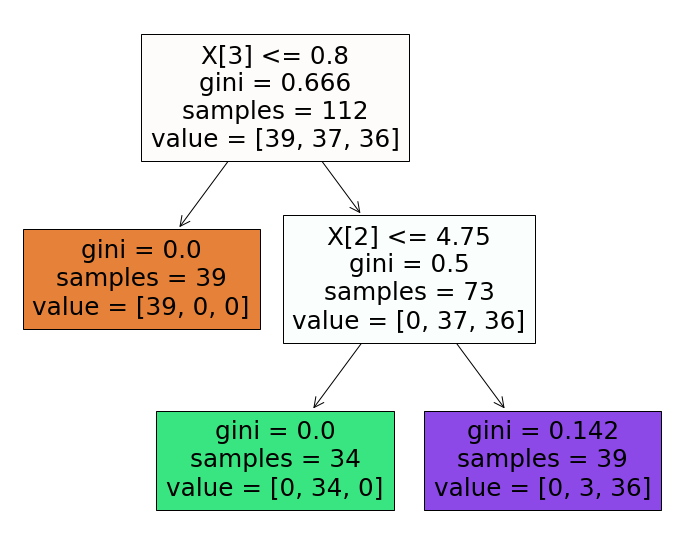

In [50]:
plt.figure(figsize=(12,10))
tree.plot_tree(dtc_u,filled=True)
plt.show()

#### Seeing gini on combination of hyperparameters by grid_search

In [51]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}
## hyperparameters

In [52]:
grid_search = GridSearchCV(estimator=dtc,param_grid=grid_param,cv=5,n_jobs =-1) 

In [53]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [54]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 8, 'splitter': 'random'}


In [56]:
grid_search.best_score_   ##training accuracy-99, reliable

0.9913043478260869

In [62]:
treemodel = DecisionTreeClassifier(criterion ='gini', max_depth=8, min_samples_leaf= 3, min_samples_split= 8, splitter= 'random')                           

In [63]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=8,
                       splitter='random')

In [64]:
y_pred=treemodel.predict(x_test)

In [65]:
accuracy_score(y_test,y_pred)

0.8947368421052632